In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import csv
from requests import get
from io import BytesIO
from zipfile import ZipFile
import urllib.request as urllib2

In [3]:
r = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip").read()
file = ZipFile(BytesIO(r))
energy_csv = file.open("household_power_consumption.txt")
df_elc = pd.read_csv(energy_csv, sep = ";", low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
#df_elc = pd.read_csv(energy_csv, sep = ";", low_memory=False, infer_datetime_format=True)
#print(df_elc)

In [4]:
df_elc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


#### **DATA WRANGLING** **EXCERCISE**

In [5]:
df_elc.isnull().sum() 

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df_elc.replace('?', np.nan, inplace=True)

In [7]:
df_elc.isnull().sum() 

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
df_elc = df_elc.astype('float32')

In [9]:
df_elc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [10]:
df_elc.mean()

Global_active_power        1.091631
Global_reactive_power      0.123704
Voltage                  243.381332
Global_intensity           4.629239
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
dtype: float32

In [11]:
df_elc.fillna(df_elc.mean(), inplace=True)

In [12]:
df_elc.isnull().sum() 

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

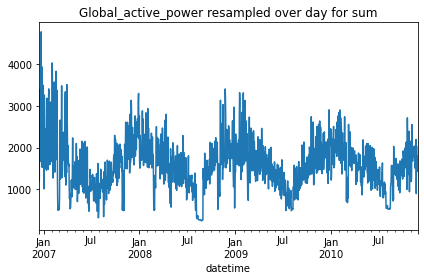

In [13]:
df_elc.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

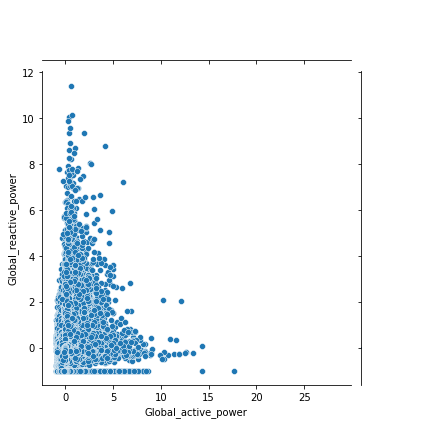

In [14]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df_elc.pct_change()
sns.jointplot(x='Global_active_power', y='Global_reactive_power', data=data_returns)  

plt.show()

In [15]:
 df_elc['Global_active_power'].corr(df_elc['Global_reactive_power'])

0.2470170525119604

In [16]:
 df_elc['Voltage'].corr(df_elc['Global_intensity'])

-0.409784632727921

In [17]:
df_elc_daily = df_elc.resample('D').sum()

In [18]:
df_elc_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536011,142.354004,345883.84375,8660.400391,4855.0,2110.0,10136.0
2010-11-23,1577.536011,137.449997,346428.75000,6731.200195,1871.0,458.0,7611.0
2010-11-24,1796.248047,132.460007,345644.59375,7559.399902,1096.0,2848.0,12224.0


In [19]:
df_elc_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536011,142.354004,345883.84375,8660.400391,4855.0,2110.0,10136.0
2010-11-23,1577.536011,137.449997,346428.75000,6731.200195,1871.0,458.0,7611.0
2010-11-24,1796.248047,132.460007,345644.59375,7559.399902,1096.0,2848.0,12224.0


In [20]:
df_elc_daily = df_elc_daily.assign(date_tt=df_elc_daily.index)

In [21]:
df_elc_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_tt
datetime,,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0,2006-12-16
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0,2006-12-17
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0,2006-12-18
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0,2006-12-19
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0,2006-12-20
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536011,142.354004,345883.84375,8660.400391,4855.0,2110.0,10136.0,2010-11-22
2010-11-23,1577.536011,137.449997,346428.75000,6731.200195,1871.0,458.0,7611.0,2010-11-23
2010-11-24,1796.248047,132.460007,345644.59375,7559.399902,1096.0,2848.0,12224.0,2010-11-24


In [22]:
df_elc_daily = df_elc_daily.rename(columns={"date_tt" : "ds" , "Global_active_power" : "y"}) 

In [23]:
df_elc_daily

,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ds
datetime,,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0,2006-12-16
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0,2006-12-17
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0,2006-12-18
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0,2006-12-19
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0,2006-12-20
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536011,142.354004,345883.84375,8660.400391,4855.0,2110.0,10136.0,2010-11-22
2010-11-23,1577.536011,137.449997,346428.75000,6731.200195,1871.0,458.0,7611.0,2010-11-23
2010-11-24,1796.248047,132.460007,345644.59375,7559.399902,1096.0,2848.0,12224.0,2010-11-24


In [24]:
test_size = 365

df_d_train = df_elc_daily[:-test_size]
df_d_test = df_elc_daily[-test_size:]

In [25]:
df_d_test

,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ds
datetime,,,,,,,,
2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0,2009-11-27
2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0,2009-11-28
2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0,2009-11-29
2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0,2009-11-30
2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0,2009-12-01
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536011,142.354004,345883.84375,8660.400391,4855.0,2110.0,10136.0,2010-11-22
2010-11-23,1577.536011,137.449997,346428.75000,6731.200195,1871.0,458.0,7611.0,2010-11-23
2010-11-24,1796.248047,132.460007,345644.59375,7559.399902,1096.0,2848.0,12224.0,2010-11-24


In [26]:
from fbprophet import Prophet 
model_en = Prophet() 

In [27]:
model_en.fit(df_d_train) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
#predict for the next 365 days 
future = model_en.make_future_dataframe(periods= 365) 
forecast = model_en.predict(future) 
forecast.head() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1650.071328,1875.163669,3006.031557,1650.071328,1650.071328,775.004842,775.004842,775.004842,245.813256,245.813256,245.813256,529.191586,529.191586,529.191586,0.0,0.0,0.0,2425.076170
1,2006-12-17,1649.910702,1876.496322,2991.333401,1649.910702,1649.910702,771.844221,771.844221,771.844221,228.519177,228.519177,228.519177,543.325044,543.325044,543.325044,0.0,0.0,0.0,2421.754924
2,2006-12-18,1649.750077,1414.223414,2597.469847,1649.750077,1649.750077,397.001867,397.001867,397.001867,-161.286790,-161.286790,-161.286790,558.288657,558.288657,558.288657,0.0,0.0,0.0,2046.751944
3,2006-12-19,1649.589452,1621.442611,2768.984381,1649.589452,1649.589452,544.306666,544.306666,544.306666,-29.332428,-29.332428,-29.332428,573.639094,573.639094,573.639094,0.0,0.0,0.0,2193.896118
4,2006-12-20,1649.428826,1621.029721,2806.233040,1649.428826,1649.428826,564.208290,564.208290,564.208290,-24.708851,-24.708851,-24.708851,588.917141,588.917141,588.917141,0.0,0.0,0.0,2213.637116
